<h1 align=center><font size="5"> EDA 1: Genetic dataset of zoonotic viruses </font></h1>

<h1 align=center><font size="2"> Author: Shahzaib S. Warraich </font></h1>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#load_dataset">Loading the genetic data</a></li>
        <li><a href="#modeling">Data cleaning</a></li>
        <li><a href="#evaluation">Feature selection</a></li>
        <li><a href="#practice">Conclusion</a></li>
    </ol>
</div>
<br>
<hr>

<h2 id="load_dataset">1. Loading the genetic data</h2>


|Field name|Description|
|--- |--- |
|vVirusNameCorrected|Name of the virus|
|vOrder|Order of the virus|
|vFamily|Main family of the virus|
|vSubfamily|Sub-family of the virus|
|vGenus|Biological class of the virus|
|vPubMedCites|Number of citations in the past|
|vGenomeAveLength|Average length of the genome|
|vCytoReplicTF|Does it have cytoplasmic replication|
|vVectorYNna|Is a vector based or not|
|vDNAoRNA|Belongs to DNA or RNA type|
|vEnvelope|Is envelop based or not|
|IsZoonotic|Zoonotic potential of the virus|


In [3]:
import pandas as pd
raw=pd.read_excel("C:\\Users\\Administrator\\Desktop\\Genetic dataset.xlsx")
raw.head(10)


,vVirusNameCorrected,vOrder,vFamily,vSubfamily,vGenus,vIsTypeSpecies,vICTVnumber,ReverseZoonoses,IsHoSa,IsHoSa.stringent,...,vWOKcites,vPubMedCites,vCytoReplicTF,vSegmentedTF,vVectorYNna,vSSoDS,vDNAoRNA,vEnvelope,IsZoonotic,IsZoonotic.stringent
0,Adelaide_River_virus,Mononegavirales,Rhabdoviridae,NaN,Ephemerovirus,0,NaN,0,0,0,...,6,7,1.0,False,Y,SS,RNA,enveloped,0,0
1,Adeno-associated_virus-1,Unassigned,Parvoviridae,Parvovirinae,Dependovirus,0,00.050.1.03.002.,0,1,0,...,54,14,0.0,False,NaN,SS,DNA,non-enveloped,1,0
2,Adeno-associated_virus-2,Unassigned,Parvoviridae,Parvovirinae,Dependovirus,1,00.050.1.03.001.,1,1,1,...,573,381,0.0,False,NaN,SS,DNA,non-enveloped,1,0
3,Adeno-associated_virus-5,Unassigned,Parvoviridae,Parvovirinae,Dependovirus,0,NaN,0,1,1,...,4,4,0.0,False,NaN,SS,DNA,non-enveloped,0,0
4,African_green_monkey_polyomavirus,Unassigned,Polyomaviridae,NaN,Polyomavirus,NaN,NaN,0,1,0,...,1,0,1.0,False,N,DS,DNA,non-enveloped,1,0
5,African_green_monkey_simian_foamy_virus,Unassigned,Retroviridae,Spumaretrovirinae,Spumavirus,0,00.061.2.07.007.00.003.,0,0,0,...,1,14,0.0,False,N,SS,RNA,enveloped,0,0
6,African_horse_sickness_virus,Unassigned,Reoviridae,Sedoreovirinae,Orbivirus,0,00.060.0.02.002.,0,0,0,...,418,291,1.0,True,Y,DS,RNA,non-enveloped,0,0
7,African_swine_fever_virus,Unassigned,Asfarviridae,NaN,Asfivirus,1,00.002.0.01.001.,0,0,0,...,969,789,1.0,False,Y,DS,DNA,enveloped,0,0
8,Aichi_virus,Picornavirales,Picornaviridae,NaN,Kobuvirus,1,NaN,0,1,1,...,100,80,1.0,False,N,SS,RNA,non-enveloped,0,0
9,Akabane_virus,Unassigned,Bunyaviridae,NaN,Orthobunyavirus,0,00.011.0.01.003.,0,0,0,...,232,126,1.0,True,Y,SS,RNA,enveloped,0,0


<h2 id="load_dataset">2. Data cleaning</h2>

In [4]:
raw.dtypes

vVirusNameCorrected      object
vOrder                   object
vFamily                  object
vSubfamily               object
vGenus                   object
vIsTypeSpecies           object
vICTVnumber              object
ReverseZoonoses           int64
IsHoSa                    int64
IsHoSa.stringent          int64
vGenomeMinLength        float64
vGenomeMaxLength        float64
vGenomeAveLength        float64
vWOKcites                 int64
vPubMedCites              int64
vCytoReplicTF           float64
vSegmentedTF               bool
vVectorYNna              object
vSSoDS                   object
vDNAoRNA                 object
vEnvelope                object
IsZoonotic                int64
IsZoonotic.stringent      int64
dtype: object

In [5]:
raw.describe()

,ReverseZoonoses,IsHoSa,IsHoSa.stringent,vGenomeMinLength,vGenomeMaxLength,vGenomeAveLength,vWOKcites,vPubMedCites,vCytoReplicTF,IsZoonotic,IsZoonotic.stringent
count,586.000000,586.000000,586.000000,80.000000,77.000000,567.000000,586.000000,586.000000,584.000000,586.000000,586.000000
mean,0.011945,0.448805,0.339590,24112.650000,26979.701299,37305.484224,729.411263,574.517065,0.645548,0.320819,0.182594
std,0.108733,0.497797,0.473975,42705.398227,44428.576232,56379.604924,5064.236790,2567.653272,0.478757,0.467190,0.386663
min,0.000000,0.000000,0.000000,528.000000,3267.000000,1682.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7685.250000,8038.000000,8914.000000,2.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,12017.000000,12450.000000,12016.000000,11.000000,9.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,15476.250000,21000.000000,21192.500000,117.750000,116.500000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,225136.000000,220915.000000,241087.000000,95332.000000,31456.000000,1.000000,1.000000,1.000000


In [6]:
raw.columns

Index(['vVirusNameCorrected', 'vOrder', 'vFamily', 'vSubfamily', 'vGenus',
       'vIsTypeSpecies', 'vICTVnumber', 'ReverseZoonoses', 'IsHoSa',
       'IsHoSa.stringent', 'vGenomeMinLength', 'vGenomeMaxLength',
       'vGenomeAveLength', 'vWOKcites', 'vPubMedCites', 'vCytoReplicTF',
       'vSegmentedTF', 'vVectorYNna', 'vSSoDS', 'vDNAoRNA', 'vEnvelope',
       'IsZoonotic', 'IsZoonotic.stringent'],
      dtype='object')

In [7]:
viruses=raw[['vVirusNameCorrected','vFamily','vDNAoRNA','vGenus','vGenomeAveLength','vCytoReplicTF','vPubMedCites','vWOKcites','vVectorYNna','vEnvelope','IsZoonotic']]

In [8]:
viruses.dropna(inplace=True)
viruses.head()

E:\2020v Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,vVirusNameCorrected,vFamily,vDNAoRNA,vGenus,vGenomeAveLength,vCytoReplicTF,vPubMedCites,vWOKcites,vVectorYNna,vEnvelope,IsZoonotic
0,Adelaide_River_virus,Rhabdoviridae,RNA,Ephemerovirus,14627.0,1.0,7,6,Y,enveloped,0
4,African_green_monkey_polyomavirus,Polyomaviridae,DNA,Polyomavirus,5270.0,1.0,0,1,N,non-enveloped,1
5,African_green_monkey_simian_foamy_virus,Retroviridae,RNA,Spumavirus,13111.0,0.0,14,1,N,enveloped,0
6,African_horse_sickness_virus,Reoviridae,RNA,Orbivirus,19200.0,1.0,291,418,Y,non-enveloped,0
7,African_swine_fever_virus,Asfarviridae,DNA,Asfivirus,170101.0,1.0,789,969,Y,enveloped,0


In [9]:
viruses.shape

(542, 11)

In [10]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
viruses['vVectorYNna']=number.fit_transform(viruses['vVectorYNna'].astype('str'))
viruses['vEnvelope']=number.fit_transform(viruses['vEnvelope'].astype('str'))
viruses['vDNAoRNA']=number.fit_transform(viruses['vDNAoRNA'].astype('str'))
viruses.head(10)


E:\2020v Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\2020v Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
E:\2020v Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,vVirusNameCorrected,vFamily,vDNAoRNA,vGenus,vGenomeAveLength,vCytoReplicTF,vPubMedCites,vWOKcites,vVectorYNna,vEnvelope,IsZoonotic
0,Adelaide_River_virus,Rhabdoviridae,1,Ephemerovirus,14627.0,1.0,7,6,1,0,0
4,African_green_monkey_polyomavirus,Polyomaviridae,0,Polyomavirus,5270.0,1.0,0,1,0,1,1
5,African_green_monkey_simian_foamy_virus,Retroviridae,1,Spumavirus,13111.0,0.0,14,1,0,0,0
6,African_horse_sickness_virus,Reoviridae,1,Orbivirus,19200.0,1.0,291,418,1,1,0
7,African_swine_fever_virus,Asfarviridae,0,Asfivirus,170101.0,1.0,789,969,1,0,0
8,Aichi_virus,Picornaviridae,1,Kobuvirus,8262.0,1.0,80,100,0,1,0
9,Akabane_virus,Bunyaviridae,1,Orthobunyavirus,12035.0,1.0,126,232,1,0,0
10,Alcelaphine_herpesvirus_1,Herpesviridae,0,Rhadinovirus,130608.0,0.0,88,102,0,0,0
11,Alcelaphine_herpesvirus_2,Herpesviridae,0,Rhadinovirus,135000.0,0.0,3,2,0,0,0
13,Allpaahuayo_virus,Arenaviridae,1,Arenavirus,10435.0,1.0,1,1,0,0,0


In [11]:
viruses['vGenomeAveLength'] = viruses['vGenomeAveLength'].astype('int')
viruses['vCytoReplicTF'] = viruses['vCytoReplicTF'].astype('int')
viruses.head()

E:\2020v Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\2020v Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,vVirusNameCorrected,vFamily,vDNAoRNA,vGenus,vGenomeAveLength,vCytoReplicTF,vPubMedCites,vWOKcites,vVectorYNna,vEnvelope,IsZoonotic
0,Adelaide_River_virus,Rhabdoviridae,1,Ephemerovirus,14627,1,7,6,1,0,0
4,African_green_monkey_polyomavirus,Polyomaviridae,0,Polyomavirus,5270,1,0,1,0,1,1
5,African_green_monkey_simian_foamy_virus,Retroviridae,1,Spumavirus,13111,0,14,1,0,0,0
6,African_horse_sickness_virus,Reoviridae,1,Orbivirus,19200,1,291,418,1,1,0
7,African_swine_fever_virus,Asfarviridae,0,Asfivirus,170101,1,789,969,1,0,0


In [12]:
viruses.rename(columns={'vVirusNameCorrected':'Virus name',
                          'vFamily':'Virus family',
                          'vDNAoRNA':'DNA/RNA','vGenus':'Virus genus','vGenomeAveLength':'Average genome length','vCytoReplicTF':'Replication in the cytoplasm','vEnvelope':'enveloped/non-enveloped','vCytoReplicTF':'Replication in the cytoplasm','vVectorYNna':'Vector-borne or not','IsZoonotic':'Zoonotic or not'}, inplace=True)
viruses.head(10)

E:\2020v Anaconda\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Virus name,Virus family,DNA/RNA,Virus genus,Average genome length,Replication in the cytoplasm,vPubMedCites,vWOKcites,Vector-borne or not,enveloped/non-enveloped,Zoonotic or not
0,Adelaide_River_virus,Rhabdoviridae,1,Ephemerovirus,14627,1,7,6,1,0,0
4,African_green_monkey_polyomavirus,Polyomaviridae,0,Polyomavirus,5270,1,0,1,0,1,1
5,African_green_monkey_simian_foamy_virus,Retroviridae,1,Spumavirus,13111,0,14,1,0,0,0
6,African_horse_sickness_virus,Reoviridae,1,Orbivirus,19200,1,291,418,1,1,0
7,African_swine_fever_virus,Asfarviridae,0,Asfivirus,170101,1,789,969,1,0,0
8,Aichi_virus,Picornaviridae,1,Kobuvirus,8262,1,80,100,0,1,0
9,Akabane_virus,Bunyaviridae,1,Orthobunyavirus,12035,1,126,232,1,0,0
10,Alcelaphine_herpesvirus_1,Herpesviridae,0,Rhadinovirus,130608,0,88,102,0,0,0
11,Alcelaphine_herpesvirus_2,Herpesviridae,0,Rhadinovirus,135000,0,3,2,0,0,0
13,Allpaahuayo_virus,Arenaviridae,1,Arenavirus,10435,1,1,1,0,0,0


<h2 id="load_dataset">3. Feature selection</h2>

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier


In [30]:
viruses.corr()

,DNA/RNA,Average genome length,Replication in the cytoplasm,vPubMedCites,vWOKcites,Vector-borne or not,enveloped/non-enveloped,Zoonotic or not
DNA/RNA,1.000000,-0.625117,0.727044,0.001179,0.041996,0.442883,-0.275151,0.308202
Average genome length,-0.625117,1.000000,-0.339569,0.013757,-0.045813,-0.265101,-0.278297,-0.147982
Replication in the cytoplasm,0.727044,-0.339569,1.000000,-0.026340,0.020215,0.430454,-0.220525,0.311899
vPubMedCites,0.001179,0.013757,-0.026340,1.000000,0.601006,-0.088717,-0.073266,0.115230
vWOKcites,0.041996,-0.045813,0.020215,0.601006,1.000000,-0.066896,0.018169,0.094748
Vector-borne or not,0.442883,-0.265101,0.430454,-0.088717,-0.066896,1.000000,-0.214915,0.256980
enveloped/non-enveloped,-0.275151,-0.278297,-0.220525,-0.073266,0.018169,-0.214915,1.000000,-0.204056
Zoonotic or not,0.308202,-0.147982,0.311899,0.115230,0.094748,0.256980,-0.204056,1.000000


In [31]:
x = np.asarray(viruses[['DNA/RNA','Average genome length', 'Replication in the cytoplasm', 'vPubMedCites', 'vWOKcites', 'Vector-borne or not', 'enveloped/non-enveloped']])
x[0:5]


array([[     1,  14627,      1,      7,      6,      1,      0],
       [     0,   5270,      1,      0,      1,      0,      1],
       [     1,  13111,      0,     14,      1,      0,      0],
       [     1,  19200,      1,    291,    418,      1,      1],
       [     0, 170101,      1,    789,    969,      1,      0]],
      dtype=int64)

In [32]:
y = np.asarray(viruses[['Zoonotic or not']])
y[0:5]

array([[0],
       [1],
       [0],
       [0],
       [0]], dtype=int64)

E:\2020v Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.03994863 0.28206651 0.05800286 0.27017381 0.29261227 0.02954704
 0.02764888]


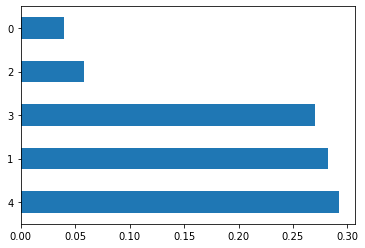

In [43]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


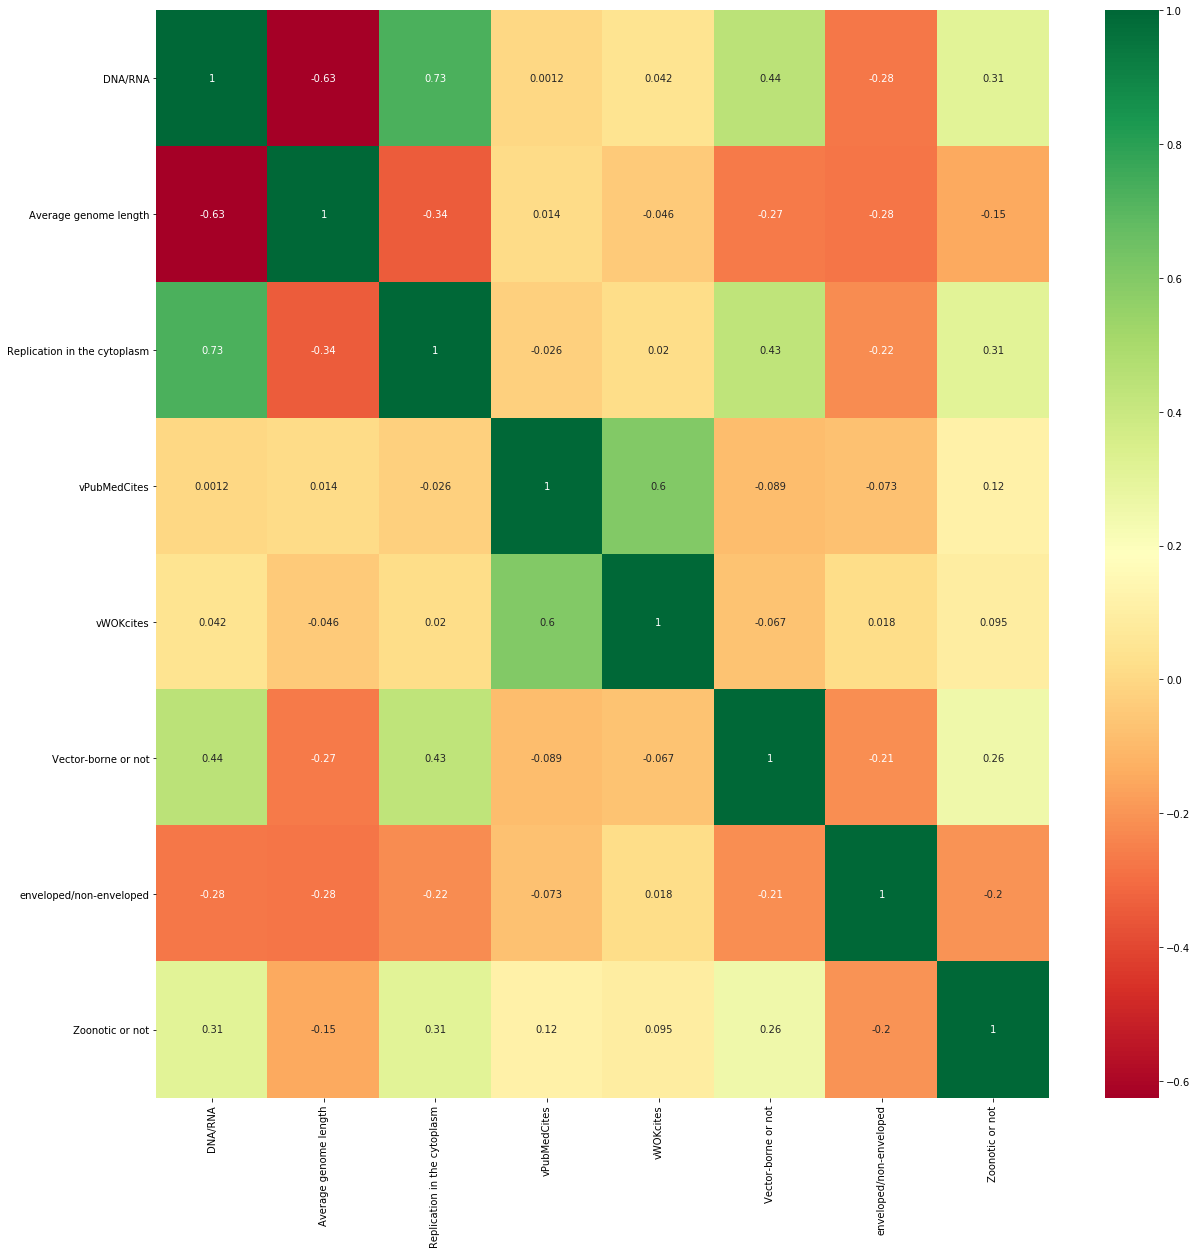

In [40]:
#get correlations of each features in dataset
corrmat = viruses.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(viruses[top_corr_features].corr(),annot=True,cmap="RdYlGn")

(0, 1.066694260485651)

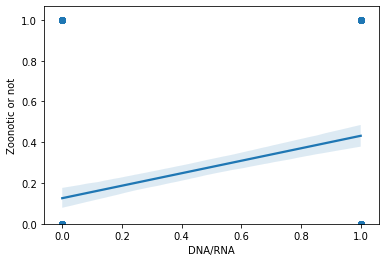

In [46]:
sns.regplot(x="DNA/RNA", y="Zoonotic or not", data=viruses)
plt.ylim(0,)

(0, 1.066694260485651)

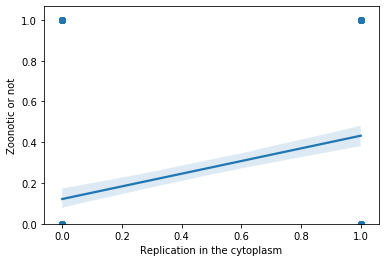

In [47]:
sns.regplot(x="Replication in the cytoplasm", y="Zoonotic or not", data=viruses)
plt.ylim(0,)

(0, 1.066694260485651)

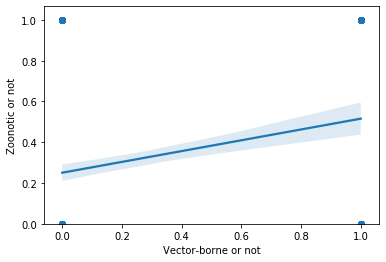

In [48]:
sns.regplot(x="Vector-borne or not", y="Zoonotic or not", data=viruses)
plt.ylim(0,)

(0, 1.066694260485651)

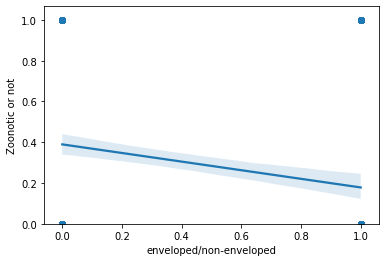

In [49]:
sns.regplot(x="enveloped/non-enveloped", y="Zoonotic or not", data=viruses)
plt.ylim(0,)

(0, 1.0674722391476155)

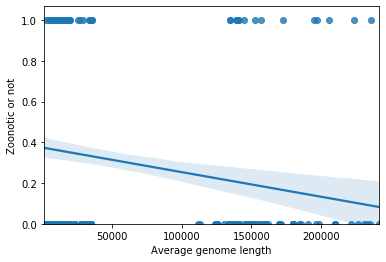

In [50]:
sns.regplot(x="Average genome length", y="Zoonotic or not", data=viruses)
plt.ylim(0,)

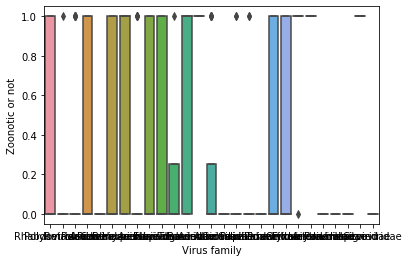

In [53]:
sns.boxplot(x="Virus family", y="Zoonotic or not", data=viruses)

<h2 id="load_dataset">4. Conclusion</h2>

<h3>Important Variables</h3>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the zoonotic pandemic's potential. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>DNA/RNA</li>
    <li>Replication in the cytoplasm</li>
    <li>Vector-borne or not</li>
    <li>enveloped/non-enveloped</li>
    <li>Average genome length</li>
   
</ul>
    


<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>